## Data Preparation Project - House price prediction



### Introduction

Houses price is one of the criteria used to determine the country wealth or state of development, as average houses price differ from country to another, even differ from one area to another, so in our project we are trying to understand the houses market and determine the factors that affect the market and main while make the prices go up or down, also predict houses price by analysing our data set using regression model and other models.
The objective here is to predict the sales price of houses in King County, Washington State – U.S. The data of houses sold was collected from May 2014 to May 2015. 
The dataset was downloaded from Kaggle website and is described as a Public domain, the data is available here https://www.kaggle.com/swathiachath/kc-housesales-data .




Importing the main libraries to be used along the process.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import pyplot as pl
from matplotlib import pylab
%matplotlib inline
plt.style.use('ggplot')

#Split and train our datset
from sklearn.model_selection import train_test_split

# The Scipy ans Statsmodels will be used to calculate Chi-Square and Anova test
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings('ignore')

### Reading house dataset

In [2]:
house = pd.read_csv('kc_house_data.csv')

In [3]:
house.head(3)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062  

[3 rows x 21 columns]

Summary of the house dataset

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Measurement Level of all variables

In [5]:
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21611.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.396095     291.509045   1971.005136     84.402258   
std        1.175459    828.128162     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

###  Drop the id and zipcode columns

In [6]:
house.drop('id', axis ='columns', inplace=True)
house.drop('zipcode', axis='columns', inplace=True)

### Calculate the mode and cardinality for all categorical variables

In [7]:
mode = house["view"].mode()
print('The view mode is {}.'.format(mode))

The view mode is 0    0
dtype: int64.


In [8]:
mode = house["waterfront"].mode()
print('The waterfront mode is {}.'.format(mode))

The waterfront mode is 0    0
dtype: int64.


In [9]:
mode = house["grade"].mode()
print('The grade mode is {}.'.format(mode))

The grade mode is 0    7
dtype: int64.


In [10]:
mode = house["condition"].mode()
print('The condition mode is {}.'.format(mode))

The condition mode is 0    3
dtype: int64.


In [11]:
mode = house["yr_renovated"].mode()
print('The year renovated mode is {}.'.format(mode))

The year renovated mode is 0    0
dtype: int64.


### Cardinality

The following selected columns are the categorical variables that we wil be choosing to print out their cardinality

In [12]:
cols = ('waterfront', 'view', 'grade', 'condition', 'yr_renovated')

Determine the number of unique categories in each variable from the dataset, this shows the number of distinct categories per variable

In [13]:
house.nunique()

date              372
price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

#### Now, we re going to print out only the distinct values of categorical variables in the data set

In [14]:
house['waterfront'].unique()

array([0, 1], dtype=int64)

In [15]:
house['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [16]:
house['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [17]:
house['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [18]:
house['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

**Convert date column to datetime format**

It will create two new columns (month, year) and add to the dataset

In [19]:
house['date'] = pd.to_datetime(house['date'])

In [20]:
house['date'] = pd.to_datetime(house['date'], format='%Y-%m-%d')

In [21]:
house['month'] = house['date'].dt.month
house['year'] = house['date'].dt.year
house.head(3)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...      1180.0              0      1955   
1           0     0          3  ...      2170.0            400      1951   
2           0     0          3  ...       770.0              0      1933   

   yr_renovated      lat     long  sqft_living15  sqft_lot15  month  year  
0             0  47.5112 -122.257           1340        5650     10  2014  
1          1991  47.7210 -122.319           1690        7639     12  2014  
2             0  47.7379 -122.233           2720        8062      2  2015  

[3 rows x 21 columns]

The Groupby() function shows the total value of houses sold each month.

In [22]:
period = house[["month","price"]].groupby(["month"]).sum()
period.reset_index(inplace=True)

In [23]:
period

month         price
0       1  5.143017e+08
1       2  6.348142e+08
2       3  1.019957e+09
3       4  1.253460e+09
4       5  1.329556e+09
5       6  1.216445e+09
6       7  1.204528e+09
7       8  1.040704e+09
8       9  9.388963e+08
9      10  1.012293e+09
10     11  7.364870e+08
11     12  7.714834e+08

### Visualization  of House total price sold by month 

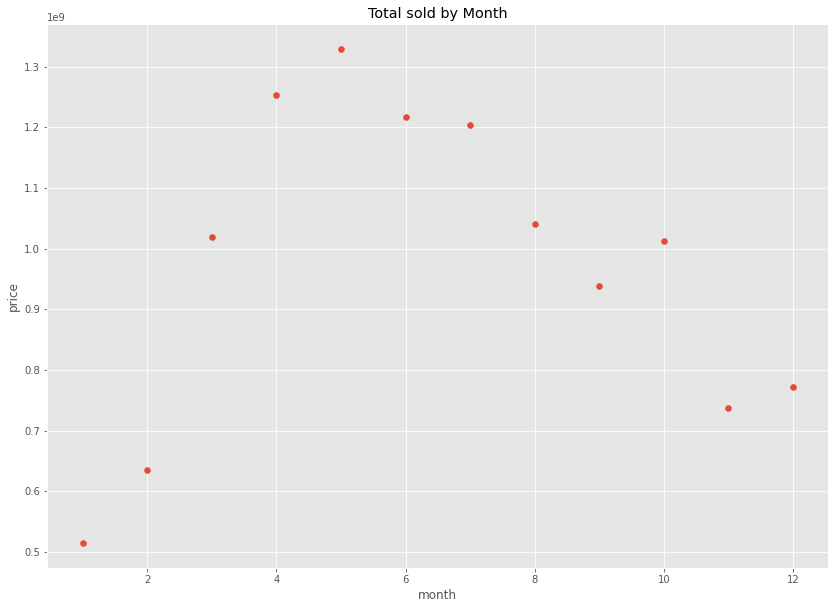

In [24]:
fig = plt.figure(figsize=(14,10))

plt.scatter(period.month, period.price)
plt.title("Total sold by Month")
plt.xlabel("month")
plt.ylabel("price");

### Visualization of house price range 

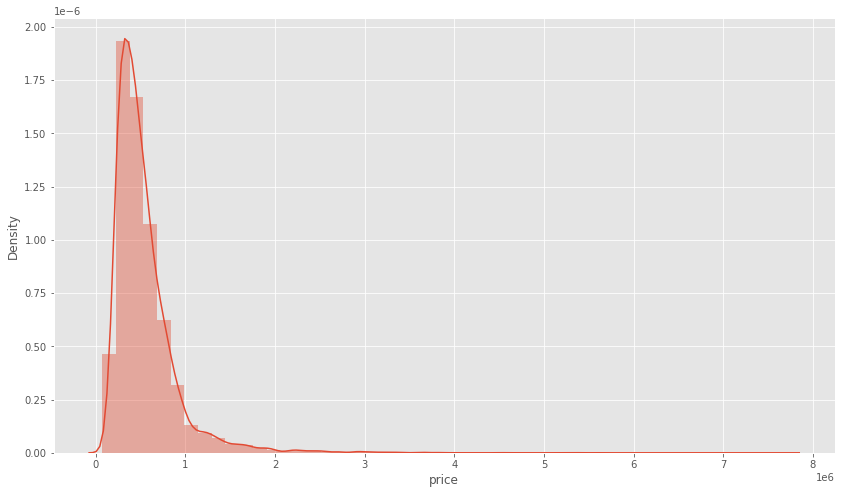

In [25]:
plt.figure(figsize=(14,8))
sns.distplot(house['price'])         
plt.show()

### Boxplots

This boxplot shows the price distribution in each range of the house condition, also alow us to identify dispersion of the outiliers after the third quantile, mainly in the categories condition (3,4,5).

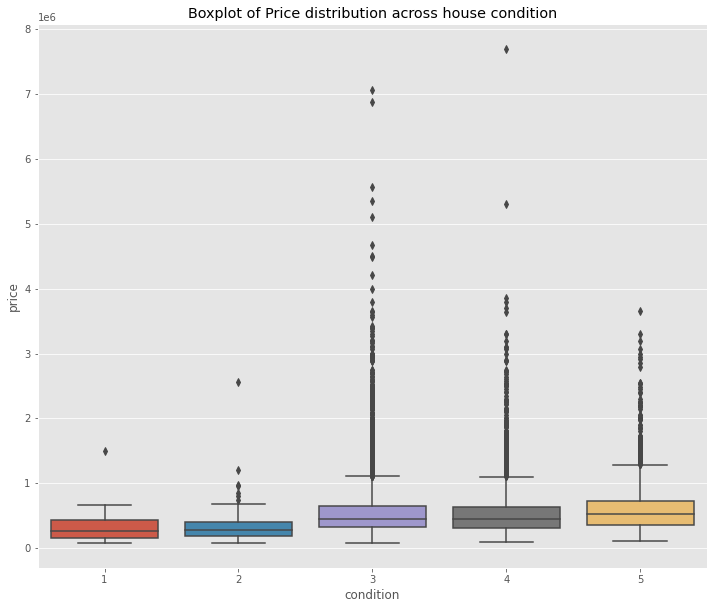

In [26]:
ax = sns.boxplot( x= 'condition', y ='price', data = house)
ax.figure.set_size_inches(12,10)
ax.set_title('Boxplot of Price distribution across house condition')
ax;

In the Boxplot of price distribution across the grade levels of the house, it is visible that houses until grade 10 all have prices bellow 1 million dollars, the grade 10 started melt the price range and from there we see the same happend in the 11 and 12 grade, end up with the condition 13 been above 2 million dollars and spread almost until 4 million dollars.
We can identify an constant increase in prices along with the crescent grades.

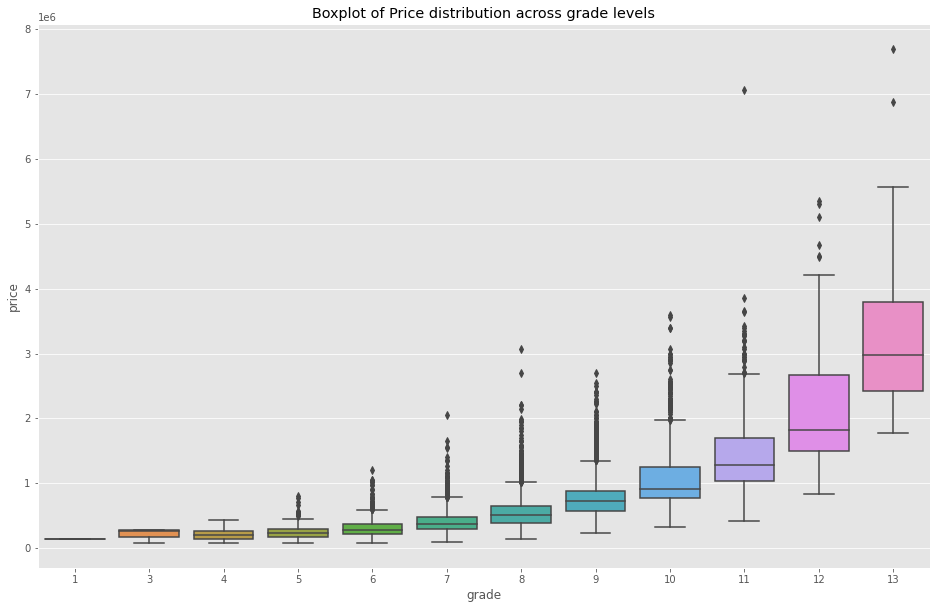

In [27]:
ax = sns.boxplot(x = 'grade', y= 'price', data = house )
ax.figure.set_size_inches(16,10)
ax.set_title('Boxplot of Price distribution across grade levels')
ax;

The code bellow shows the mode of price that was between 350000.00 to 450000.00 million dollars.
And the average house price sold in the King County, Seattle - US betweem May 2014 to May 2015 was 540088.10 million dollars.

In [28]:
mode = house["price"].mode()
print('The price mode is {}.'.format(mode))
average = house['price'].mean()
print('The average price of houses was {}.'.format(average))

The price mode is 0    350000.0
1    450000.0
dtype: float64.
The average price of houses was 540088.1417665294.


### Identify Missing Data

The heatmap does not let us identify any missing value, so we print the isnull() function and add up the total missing values

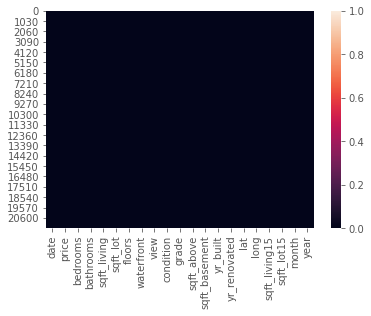

In [29]:
_=sns.heatmap(house.isnull(), cbar=True)

In [30]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

#### Replace the missing values in the sqft_above 

The replacement of missing values was use the fillna() function with value 0.

In [31]:
[(col,house[col].isnull().sum()) for col in house.columns if house[col].isnull().any()]

[('sqft_above', 2)]

In [32]:
house['sqft_above'] = house['sqft_above'].fillna('0')

In [33]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

The print bellow show as the period of data was collected (houses were solded).

In [34]:
print(min(house['date']))
print(max(house['date']))

2014-05-02 00:00:00
2015-05-27 00:00:00


### Encoding the variable yr_renovated

We conclude that the 0 value in the column yr_renovated means the house was not renovated and 1 means renovated.
In order to replace the values with 1 and 0 without dummy encode the data, the solution was created a function and define classes (periods) and label it usin the cut function from pandas, later replace the NAN values with 0.

In [35]:
house['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [36]:
house['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [37]:
classes = [0,100,2020]
labels = ['0','1']

house['yr_renovated'] = pd.cut(x= house['yr_renovated'],
      bins= classes,
      labels=labels)

house[['yr_renovated', 'yr_renovated']]

house['yr_renovated'] = house['yr_renovated'].fillna('0')

In [38]:
house['yr_renovated'].value_counts()

0    20699
1      914
Name: yr_renovated, dtype: int64

### Exploratory Data Analysis

First code identify the the time the oldestand newst houses were built.

In [39]:
old = (min(house["yr_built"]))
new = (max(house["yr_built"]))
print("The oldest house was built in {} and the most recent built was in the year {}.".format(old, new))

The oldest house was built in 1900 and the most recent built was in the year 2015.


### Calculate the minimun, maximum, range, mean, median and standard deviation of all continuos variables

In [40]:
house.describe().transpose()

count           mean            std         min         25%  \
price          21613.0  540088.141767  367127.196483  75000.0000  321950.000   
bedrooms       21613.0       3.370842       0.930062      0.0000       3.000   
bathrooms      21613.0       2.114757       0.770163      0.0000       1.750   
sqft_living    21613.0    2079.899736     918.440897    290.0000    1427.000   
sqft_lot       21613.0   15106.967566   41420.511515    520.0000    5040.000   
floors         21613.0       1.494309       0.539989      1.0000       1.000   
waterfront     21613.0       0.007542       0.086517      0.0000       0.000   
view           21613.0       0.234303       0.766318      0.0000       0.000   
condition      21613.0       3.409430       0.650743      1.0000       3.000   
grade          21613.0       7.656873       1.175459      1.0000       7.000   
sqft_basement  21613.0     291.509045     442.575043      0.0000       0.000   
yr_built       21613.0    1971.005136      29.373411   1900.0000    1951.000   
lat            21613.0      47.560053       0.138564     47.1559      47.471   
long           21613.0    -122.213896       0.140828   -122.5190    -122.328   
sqft_living15  21613.0    1986.552492     685.391304    399.0000    1490.000   
sqft_lot15     21613.0   12768.455652   27304.179631    651.0000    5100.000   
month          21613.0       6.574423       3.115308      1.0000       4.000   
year           21613.0    2014.322954       0.467616   2014.0000    2014.000   

                       50%         75%           max  
price          450000.0000  645000.000  7.700000e+06  
bedrooms            3.0000       4.000  3.300000e+01  
bathrooms           2.2500       2.500  8.000000e+00  
sqft_living      1910.0000    2550.000  1.354000e+04  
sqft_lot         7618.0000   10688.000  1.651359e+06  
floors              1.5000       2.000  3.500000e+00  
waterfront          0.0000       0.000  1.000000e+00  
view                0.0000       0.000  4.000000e+00  
condition           3.0000       4.000  5.000000e+00  
grade               7.0000       8.000  1.300000e+01  
sqft_basement       0.0000     560.000  4.820000e+03  
yr_built         1975.0000    1997.000  2.015000e+03  
lat                47.5718      47.678  4.777760e+01  
long             -122.2300    -122.125 -1.213150e+02  
sqft_living15    1840.0000    2360.000  6.210000e+03  
sqft_lot15       7620.0000   10083.000  8.712000e+05  
month               6.0000       9.000  1.200000e+01  
year             2014.0000    2015.000  2.015000e+03

#### Visualization of the mean, median and minimum value for the variable price

The normal distributed curve of the dependent variable (price) should have a symmetric distribution, however our variable is a positive skewed (to the right) because it has a long right tail, and the mean is also represented in the right side as the plot below shows.


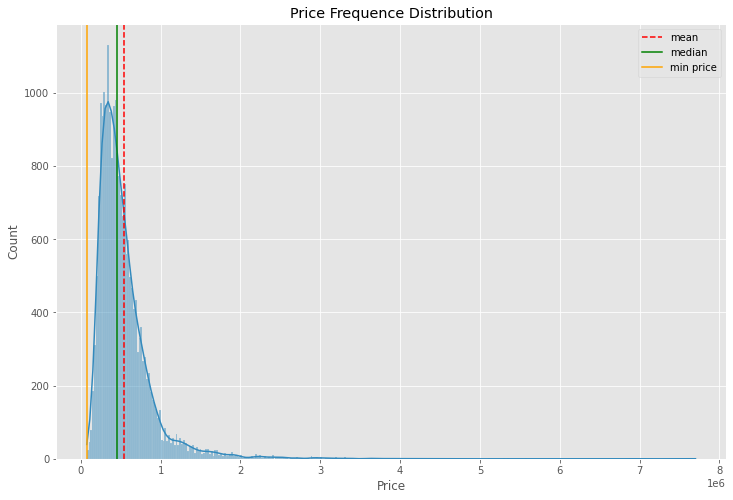

In [41]:
ax = sns.histplot(data = house, x = 'price', kde=True)
ax.figure.set_size_inches(12,8)
ax.axvline(house.price.mean(), color ='red', linestyle= '--', label='mean')
ax.axvline(house.price.median(), color ='green', linestyle= '-', label='median' )
ax.axvline(house.price.min(), color ='orange', linestyle= '-', label='min price')
ax.set_title('Price Frequence Distribution')
ax.set_xlabel('Price')
ax.legend()
ax;

#### Visualization of the mean and median value for the variable sqft_living

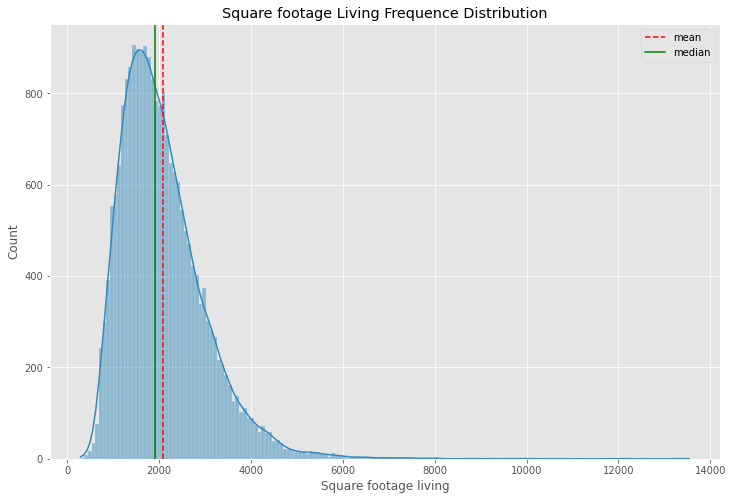

In [42]:
ax = sns.histplot(data = house, x = 'sqft_living', kde=True)
ax.figure.set_size_inches(12,8)
ax.axvline(house.sqft_living.mean(), color ='red', linestyle= '--', label='mean' )
ax.axvline(house.sqft_living.median(), color ='green', linestyle= '-', label='median' )
ax.set_title('Square footage Living Frequence Distribution')
ax.set_xlabel('Square footage living')
ax.legend()
ax;

#### Identifying possible outliers

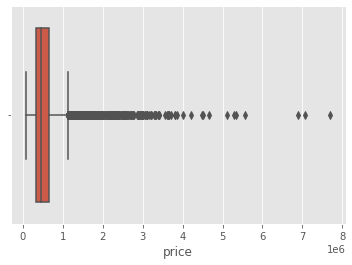

In [43]:
sns.boxplot(x="price",data=house);

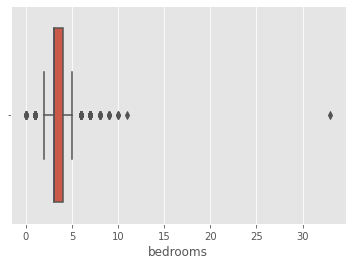

In [44]:
sns.boxplot(x="bedrooms",data=house);

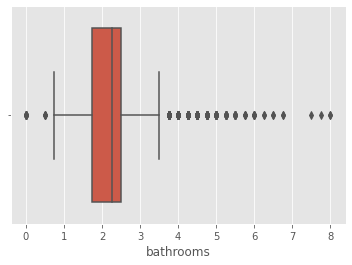

In [45]:
sns.boxplot(x="bathrooms",data=house);

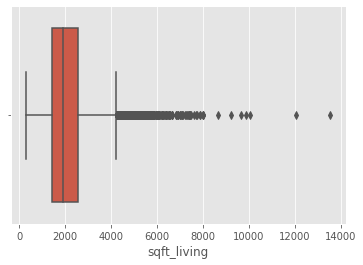

In [46]:
sns.boxplot(x="sqft_living",data=house);

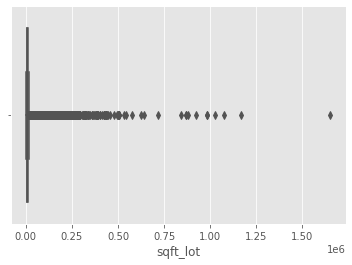

In [47]:
sns.boxplot(x="sqft_lot",data=house);

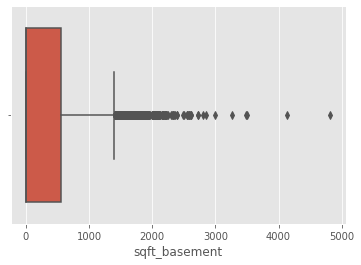

In [48]:
sns.boxplot(x="sqft_basement",data=house);

### Histograms for categorical variables

Histogran for the Categorical variable View

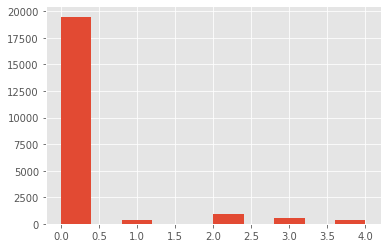

In [49]:
house.view.hist();

Histogram for the Categorical variable Waterfront

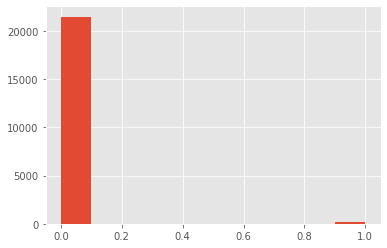

In [50]:
house.waterfront.hist();

Histogran for the Categorical variable Grade

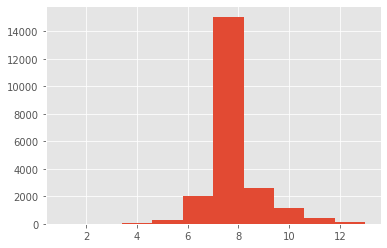

In [51]:
house.grade.hist();

Histogran for the Categorical variable Condition

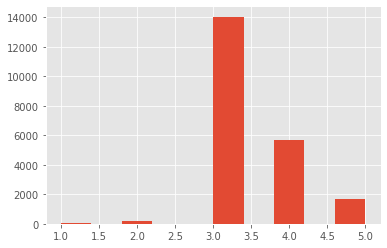

In [52]:
house.condition.hist();

Histogran for the Categorical variable Year renovated

Just a minority of the houses have been informed that were renovated, the variable does not contribute significant for the results.

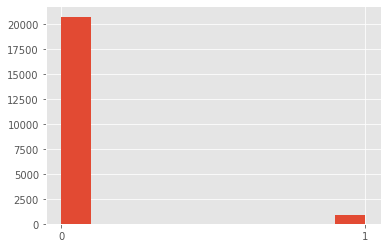

In [53]:
house.yr_renovated.hist();

The countplot() of grade count give the idea that the majority of houses are concentrated between grade 7 and 8.

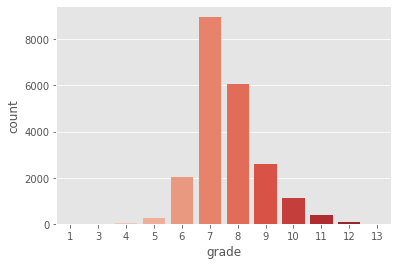

In [54]:
sb.countplot(x = "grade", data = house, palette = "Reds")
plt.show()

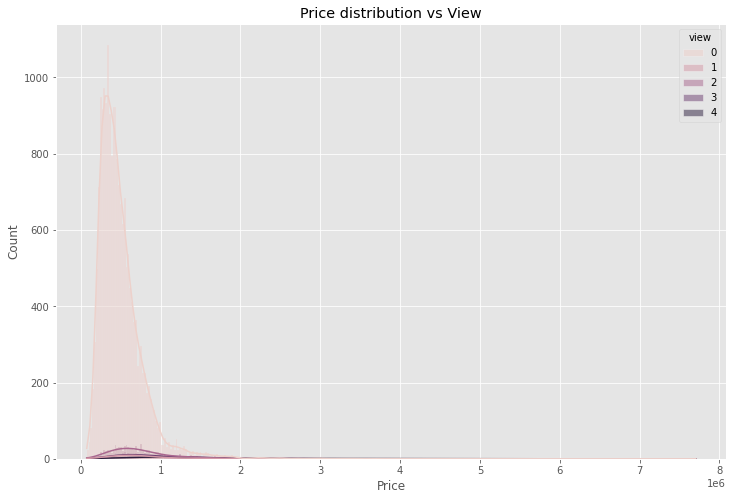

In [55]:
ax = sns.histplot(data = house, x = 'price', kde=True, hue= 'view')
ax.figure.set_size_inches(12,8)
ax.set_title('Price distribution vs View')
ax.set_xlabel('Price')
ax;

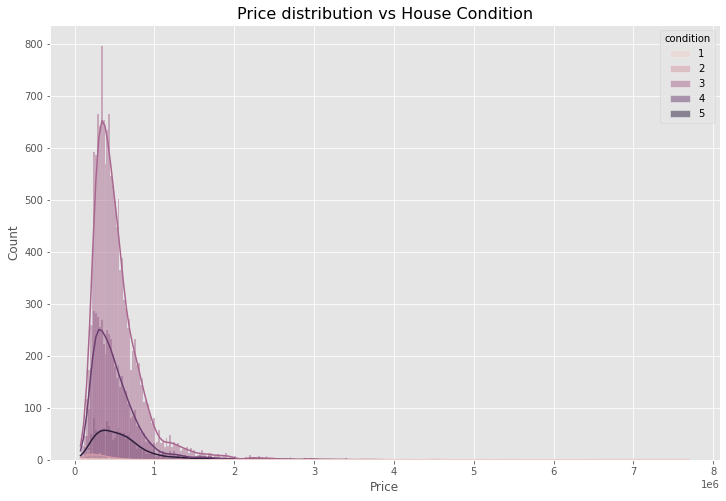

In [56]:
ax = sns.histplot(data = house, x = 'price', kde=True, hue= 'condition')
ax.figure.set_size_inches(12,8)
ax.set_title('Price distribution vs House Condition', fontsize=16)
ax.set_xlabel('Price')
ax;

 House condition here seen from the countplot show us that 14000 of the houses are in level 3 of condition (75% ~) 
 while almost 6000 houses are up to level 4 and nearly 2000 at level 5, we can assume that the houses at level 5 can account the most recent built.

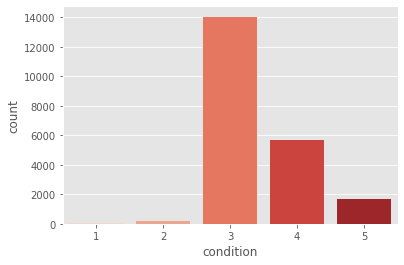

In [57]:
sb.countplot(x = "condition", data = house, palette = "Reds")
plt.show();

The plot bellow show the most sold houses vs number of bedrooms 

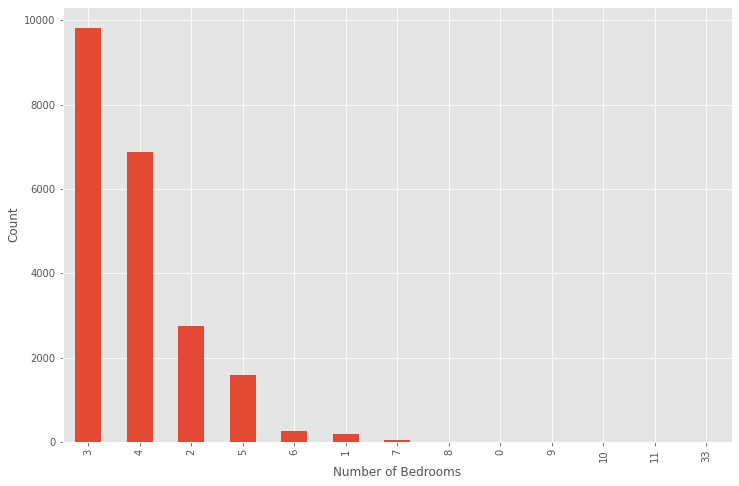

In [58]:
house['bedrooms'].value_counts().plot(kind='bar', figsize=(12,8))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count');

In [59]:
house['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

The plot bellow show the most sold houses vs number of bathrooms

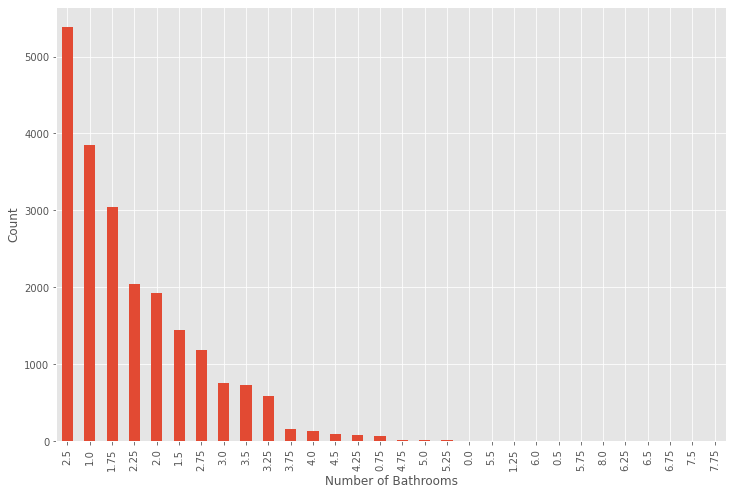

In [60]:
house['bathrooms'].value_counts().plot(kind='bar', figsize=(12,8))
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count');

### Pairplot 
The pairplot function from Seaborn can display all the variables from the dataset to be visualized and make assumptions.

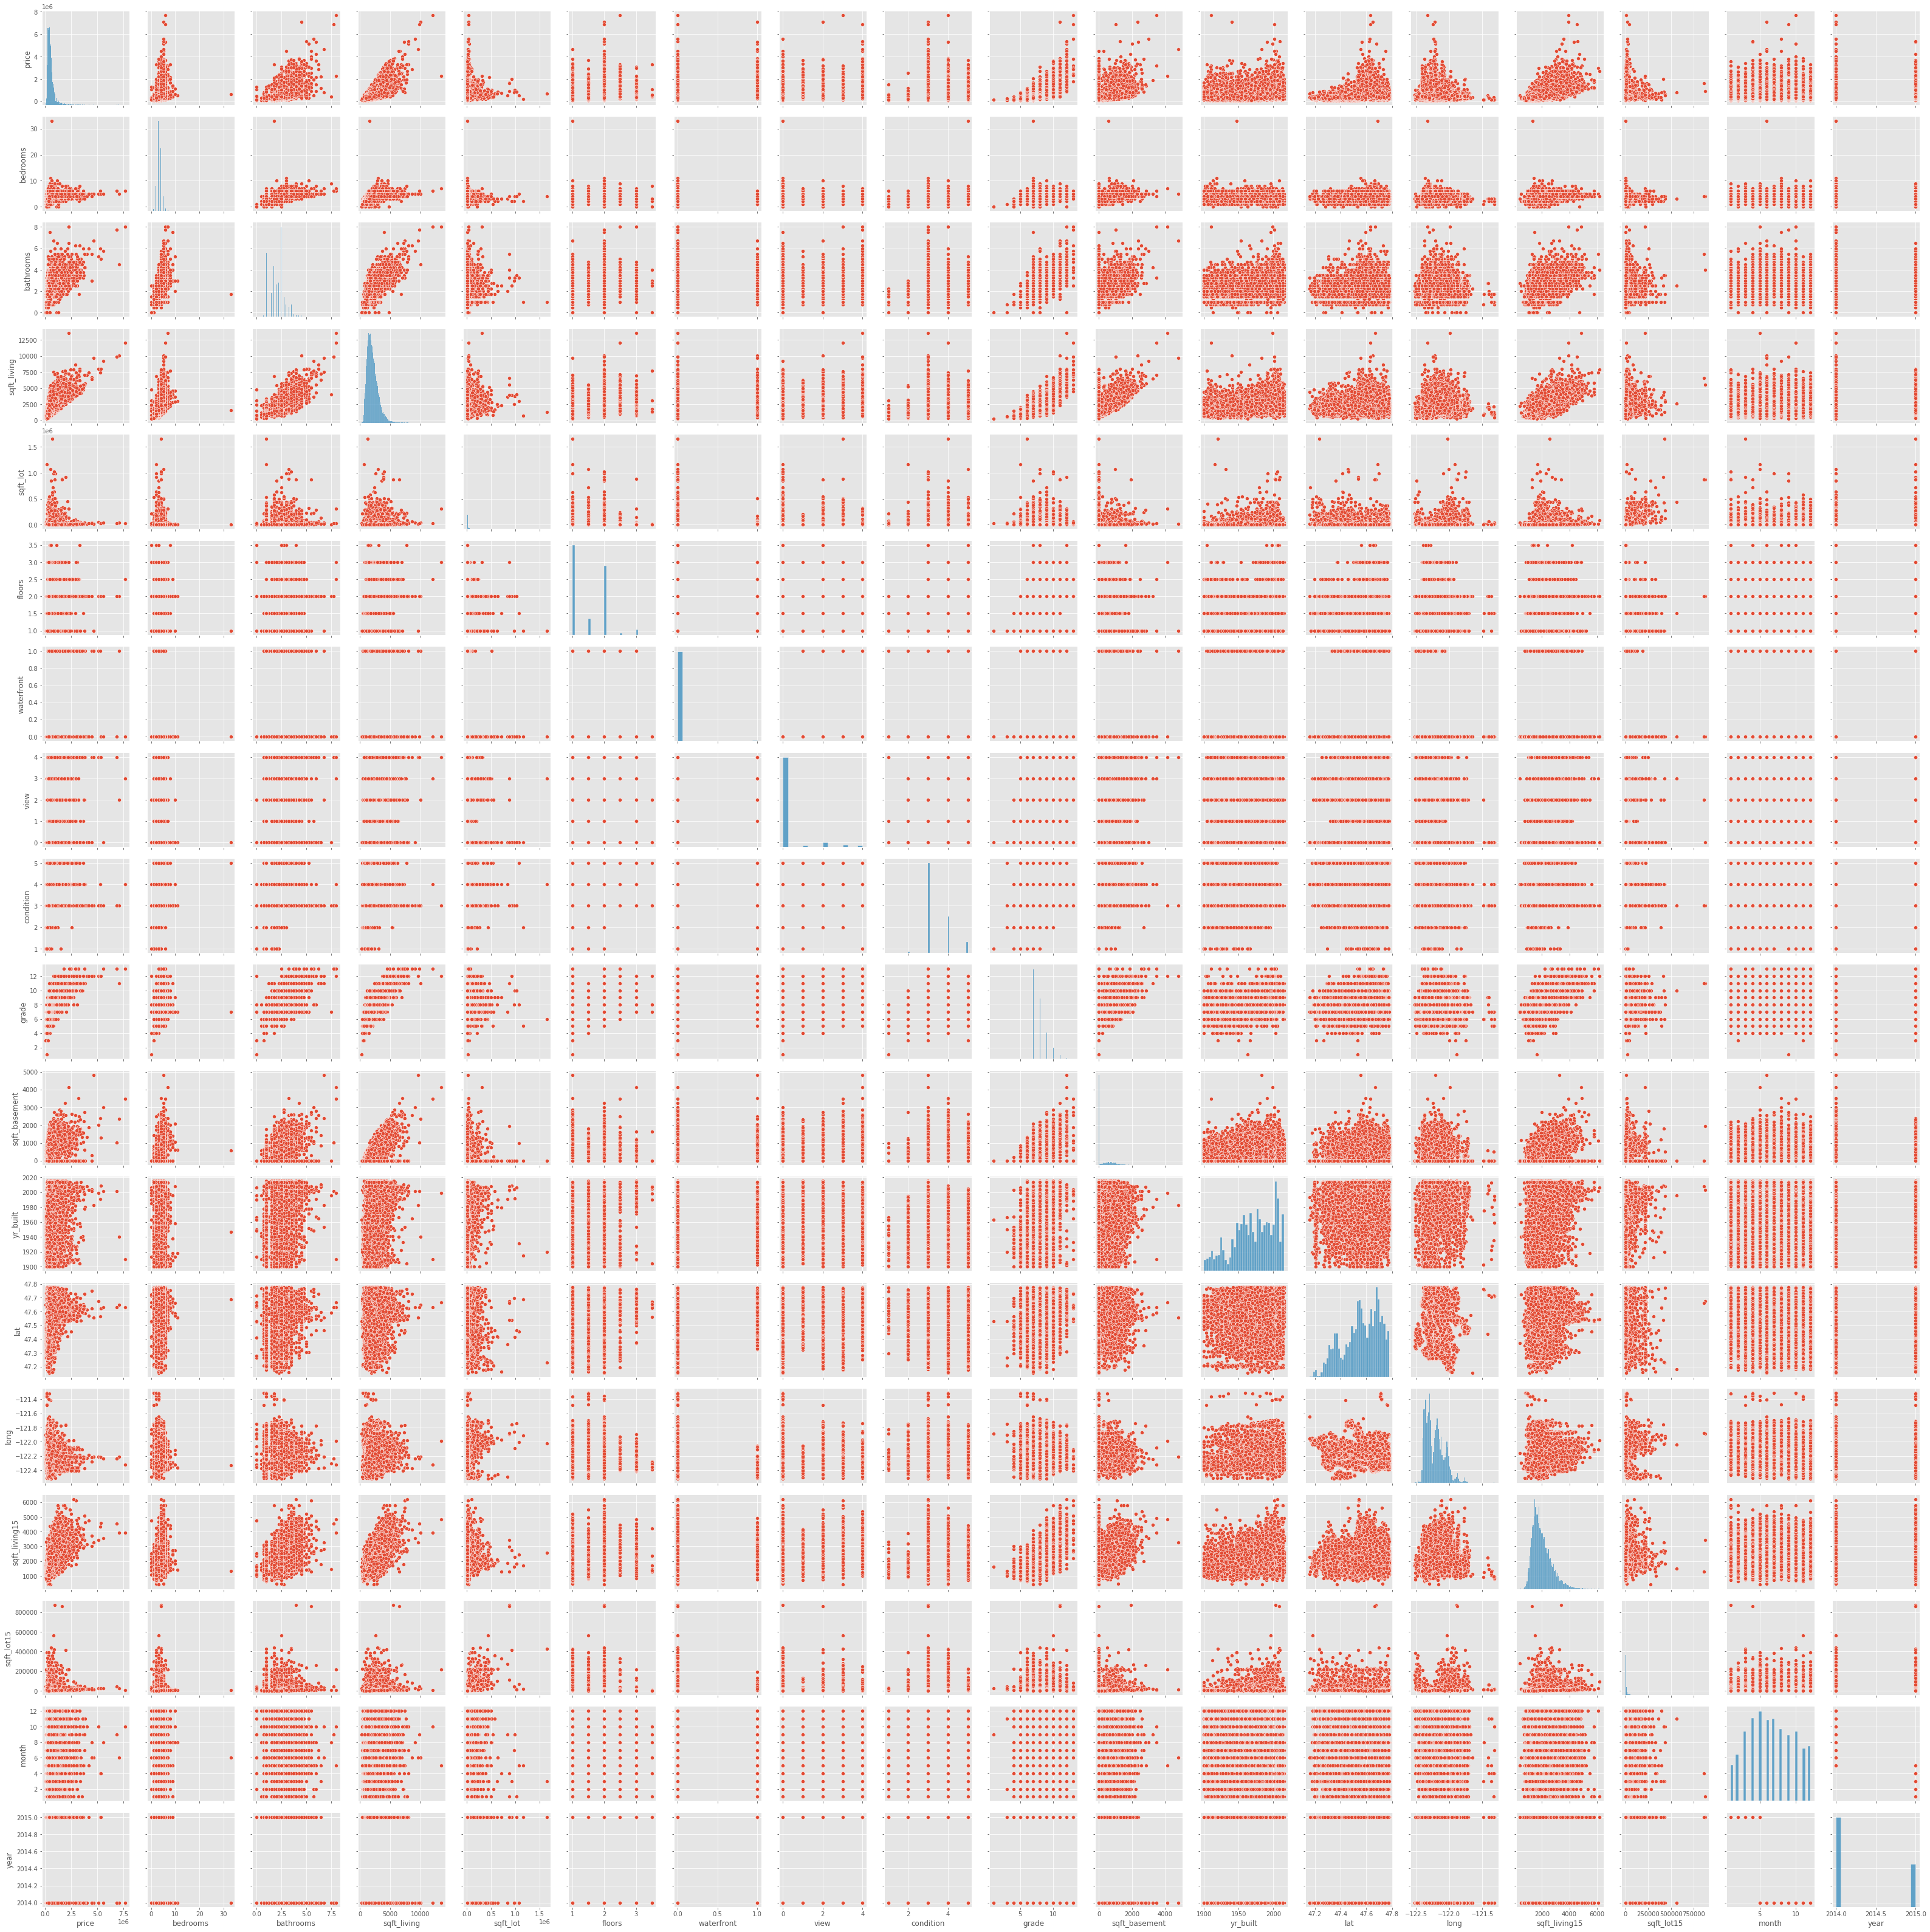

In [61]:
sns.pairplot(house)

### Correlation Matrix

To explore the visualizations and understand the correlation between the variables we plot a correlation matrix, it enables us to visualize the variables with highly influenced factors over the house sales price. By looking at the graphic we can also identify that a large proportion of the houses are under a price of $1 million.


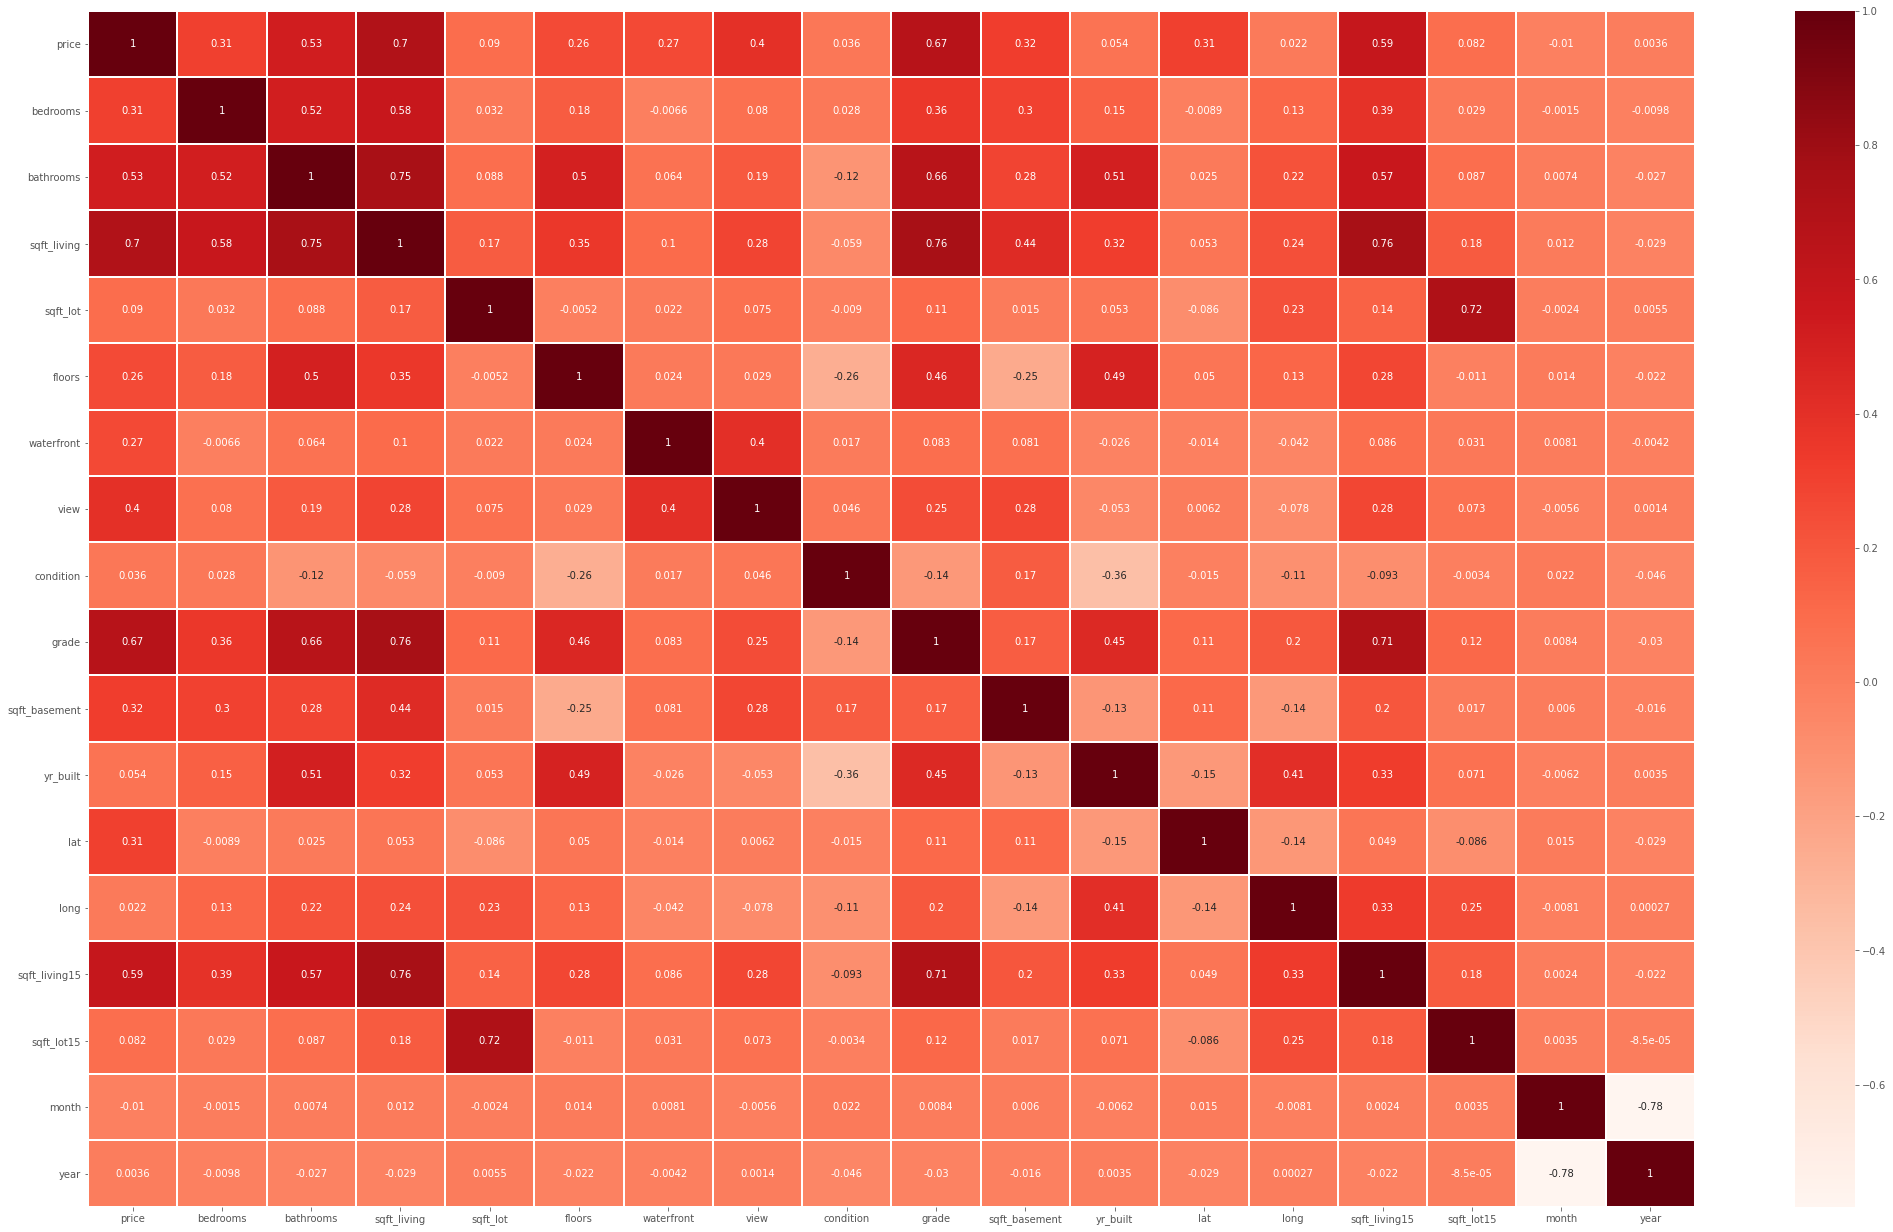

In [62]:
corr_mat = house.corr()
plt.figure(figsize=(36,22))
sns.heatmap(corr_mat, cmap = 'Reds', linecolor = 'white', linewidth = 1, annot=True);

## Chi-square statistics test


#### Compare grade and house view

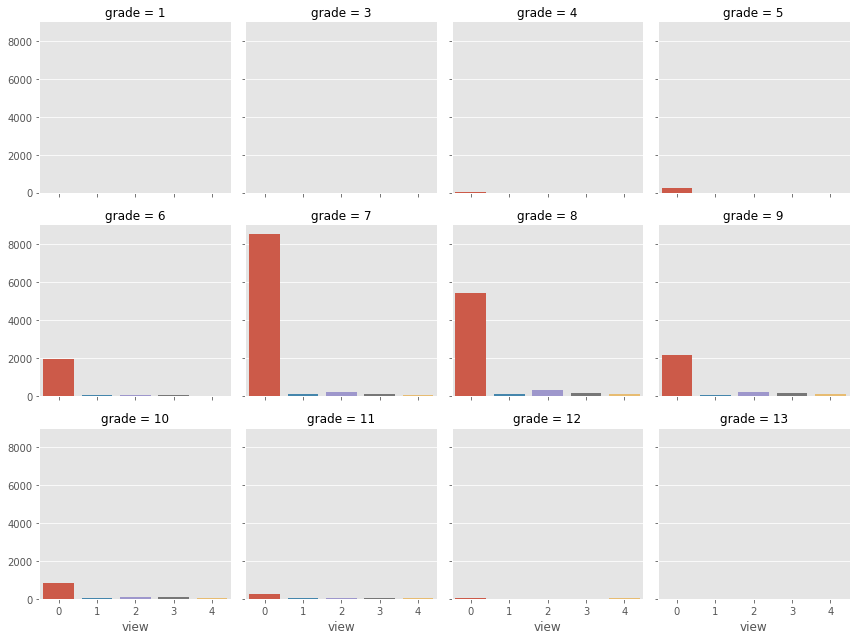

In [63]:
grid = sns.FacetGrid(house, col='grade', col_wrap=4, hue='view')
_ = grid.map(sns.countplot, 'view', order=[0,1,2,3,4])

In [64]:
ctable = pd.crosstab (house.grade,house.view)
ctable

view      0    1    2    3   4
grade                         
1         1    0    0    0   0
3         3    0    0    0   0
4        26    2    1    0   0
5       229    2    6    1   4
6      1955   15   42   14  12
7      8556   94  222   78  31
8      5412  110  326  146  74
9      2160   63  189  130  73
10      857   26  102   84  65
11      242   18   59   45  35
12       43    2   13   10  22
13        5    0    3    2   3

In [65]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 48)))
p

The chi square statistic is 1806.61. The critical value for at an alpha level of 0.05 is 65.17.


0.0

#### Compare grade vs waterfront

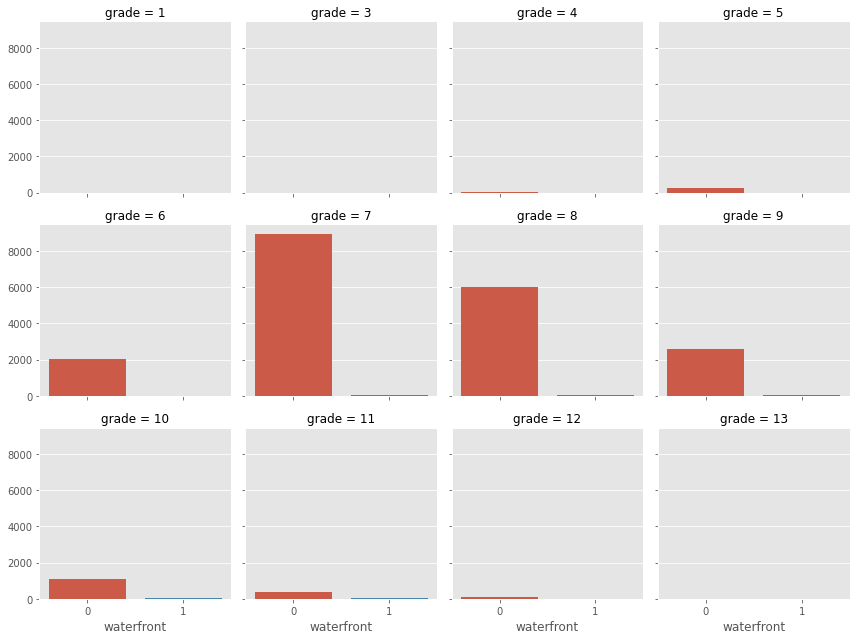

In [66]:
grid = sns.FacetGrid(house, col='grade', col_wrap=4, hue='waterfront')
_ = grid.map(sns.countplot, 'waterfront',order=[0,1])

In [67]:
ctable = pd.crosstab (house.grade,house.waterfront)
ctable

waterfront     0   1
grade               
1              1   0
3              3   0
4             29   0
5            238   4
6           2026  12
7           8958  23
8           6028  40
9           2590  25
10          1106  28
11           379  20
12            79  11
13            13   0

In [68]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 12)))
p

The chi square statistic is 334.99. The critical value for at an alpha level of 0.05 is 21.03.


3.619890779011236e-65

### compare grade vs condition

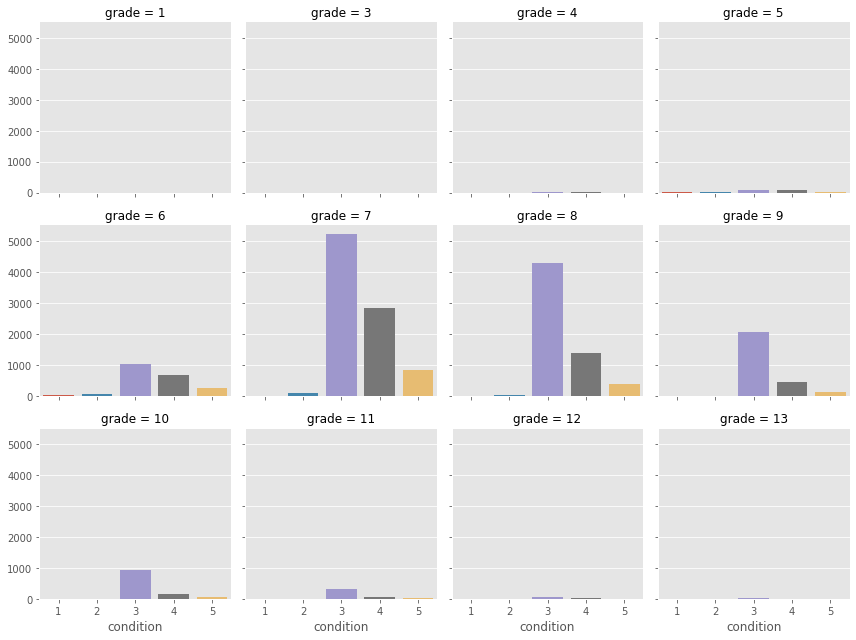

In [69]:
grid = sns.FacetGrid(house, col='grade', col_wrap=4, hue='condition')
_ = grid.map(sns.countplot, 'condition', order=[1,2,3,4,5])

In [70]:
ctable = pd.crosstab (house.grade,house.condition)
ctable

condition   1   2     3     4    5
grade                             
1           1   0     0     0    0
3           0   1     1     0    1
4           1   5    13    10    0
5           9  15   100    84   34
6          11  59  1035   685  248
7           6  75  5234  2833  833
8           2  13  4269  1394  390
9           0   2  2041   446  126
10          0   2   921   156   55
11          0   0   332    56   11
12          0   0    74    13    3
13          0   0    11     2    0

In [71]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 48)))
p

The chi square statistic is 2225.62. The critical value for at an alpha level of 0.05 is 65.17.


0.0

### compare grade vs yr_renovated

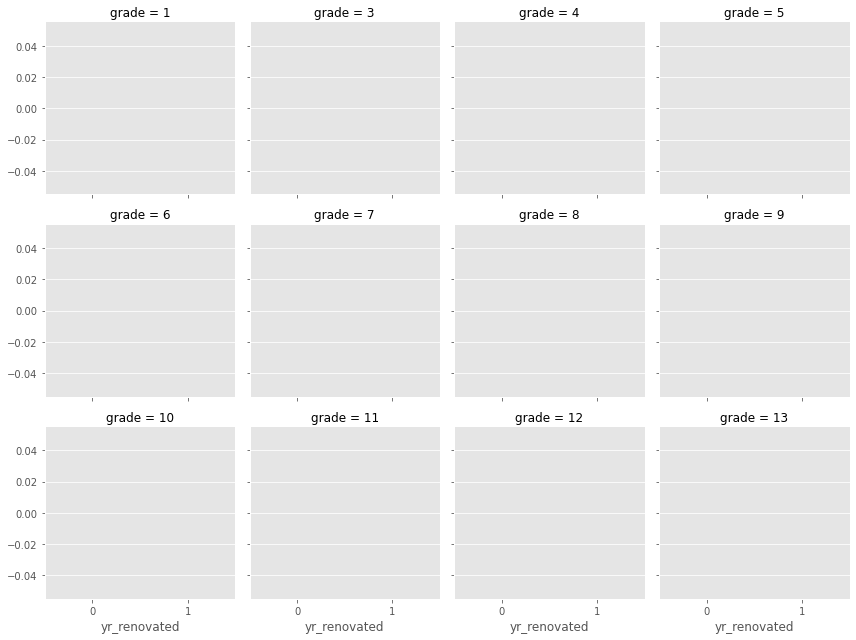

In [72]:
grid = sns.FacetGrid(house, col='grade', col_wrap=4, hue='yr_renovated')
_ = grid.map(sns.countplot, 'yr_renovated', order=[0,1])

In [73]:
ctable = pd.crosstab(house.grade,house.yr_renovated)
ctable

yr_renovated     0    1
grade                  
1                1    0
3                3    0
4               28    1
5              236    6
6             1941   97
7             8645  336
8             5803  265
9             2477  138
10            1084   50
11             384   15
12              87    3
13              10    3

In [74]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 12)))
p

The chi square statistic is 28.01. The critical value for at an alpha level of 0.05 is 21.03.


0.003224220247848153

### Compare view vs condition

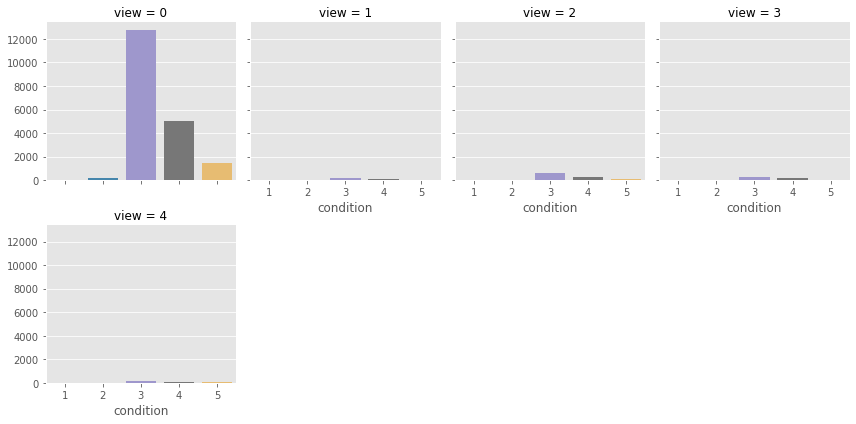

In [75]:
grid = sns.FacetGrid(house, col='view', col_wrap=4, hue='condition')
_ = grid.map(sns.countplot, 'condition', order=[1,2,3,4,5])

In [76]:
ctable = pd.crosstab (house.view,house.condition)
ctable

condition   1    2      3     4     5
view                                 
0          27  166  12768  5054  1474
1           1    1    191   105    34
2           0    3    588   268   104
3           0    2    309   153    46
4           2    0    175    99    43

In [77]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 16)))
p

The chi square statistic is 68.50. The critical value for at an alpha level of 0.05 is 26.30.


1.822893843270391e-08

### compare view vs waterfront

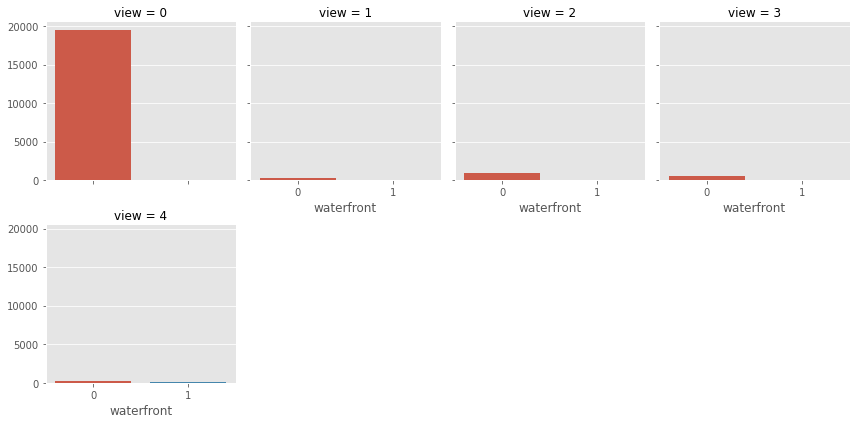

In [78]:
grid = sns.FacetGrid(house, col='view', col_wrap=4, hue='waterfront')
_ = grid.map(sns.countplot, 'waterfront', order=[0,1])

In [79]:
ctable = pd.crosstab (house.view,house.waterfront)
ctable

waterfront      0    1
view                  
0           19489    0
1             331    1
2             955    8
3             491   19
4             184  135

In [80]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 4)))
p

The chi square statistic is 7572.56. The critical value for at an alpha level of 0.05 is 9.49.


0.0

### compare view vs yr_renovated

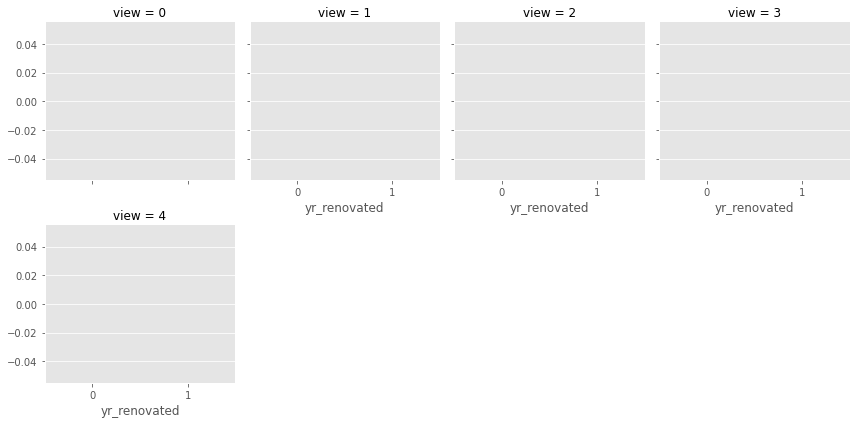

In [81]:
grid = sns.FacetGrid(house, col='view', col_wrap=4, hue='yr_renovated')
_ = grid.map(sns.countplot, 'yr_renovated', order=[0,1])

In [82]:
ctable = pd.crosstab (house.view,house.yr_renovated)
ctable

yr_renovated      0    1
view                    
0             18788  701
1               300   32
2               893   70
3               455   55
4               263   56

In [83]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 4)))
p

The chi square statistic is 259.17. The critical value for at an alpha level of 0.05 is 9.49.


6.896127956880679e-55

### compare condition vs yr_renovated

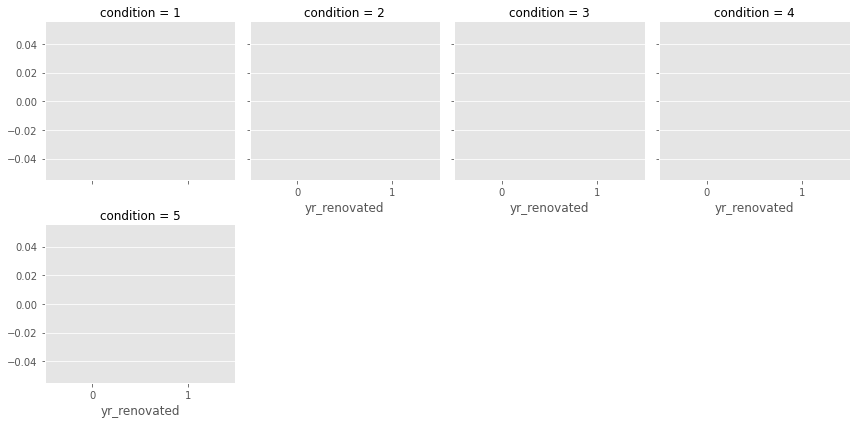

In [84]:
grid = sns.FacetGrid(house, col='condition', col_wrap=4, hue='yr_renovated')
_ = grid.map(sns.countplot, 'yr_renovated', order=[0,1])

In [85]:
ctable = pd.crosstab (house.condition,house.yr_renovated)
ctable

yr_renovated      0    1
condition               
1                29    1
2               168    4
3             13295  736
4              5543  136
5              1664   37

In [86]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 4)))
p

The chi square statistic is 102.29. The critical value for at an alpha level of 0.05 is 9.49.


3.206311471204324e-21

### compare condition vs waterfront

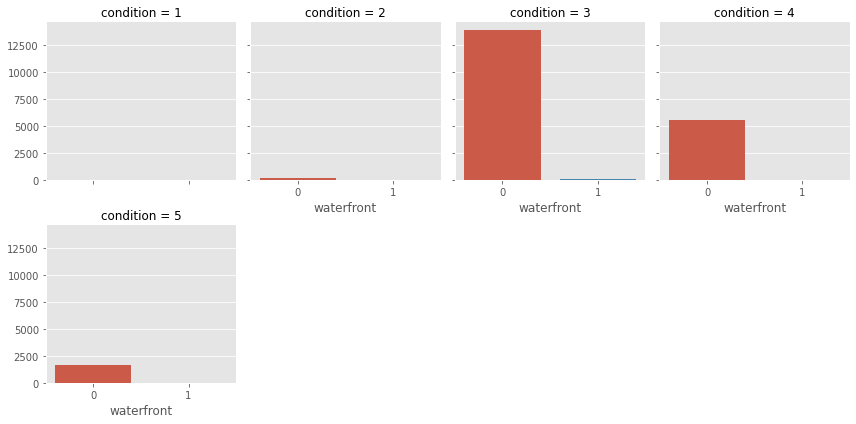

In [87]:
grid = sns.FacetGrid(house, col='condition', col_wrap=4, hue='waterfront')
_ = grid.map(sns.countplot, 'waterfront', order=[0,1])

In [88]:
ctable = pd.crosstab (house.condition,house.waterfront)
ctable

waterfront      0   1
condition            
1              29   1
2             171   1
3           13940  91
4            5629  50
5            1681  20

In [89]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 4)))
p

The chi square statistic is 10.07. The critical value for at an alpha level of 0.05 is 9.49.


0.03918751144589182

### compare waterfront vs yr_renovated

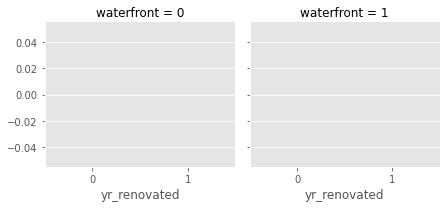

In [90]:
grid = sns.FacetGrid(house, col='waterfront', col_wrap=4, hue='yr_renovated')
_ = grid.map(sns.countplot, 'yr_renovated', order=[0,1])

In [91]:
ctable = pd.crosstab (house.waterfront, house.yr_renovated)
ctable

yr_renovated      0    1
waterfront              
0             20578  872
1               121   42

In [92]:
statistic, p, dof, exfr = stats.chi2_contingency(ctable, correction=True)
print('The chi square statistic is {:.2f}. The critical value for at an alpha level of 0.05 is {:.2f}.'.
      format(statistic, stats.chi2.ppf(0.95, 1)))
p

The chi square statistic is 182.79. The critical value for at an alpha level of 0.05 is 3.84.


1.1904848336743099e-41

## One-way Anova Test using StatsModels

For all categorical variables: view, waterfront, grade, condition, yr_renovated vs Price (continuous variable).


In [93]:
import statsmodels.api as sm
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

### One-way ANOVA price ~ view

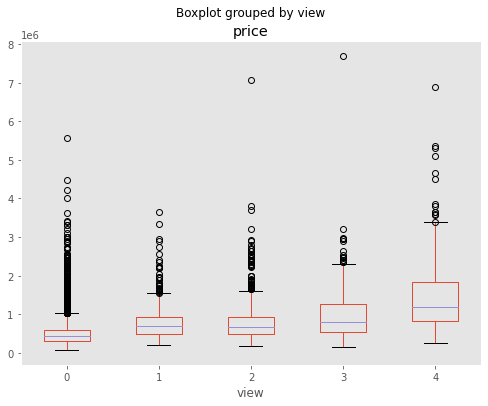

In [94]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
fig = house.boxplot('price', 'view', ax=ax, grid=False)

In [96]:
model = ols('price ~ C(view)',house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1093.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:19:38   Log-Likelihood:            -3.0561e+05
No. Observations:               21613   AIC:                         6.112e+05
Df Residuals:                   21608   BIC:                         6.113e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.966e+05   2398.613    207.021      0.000    4.92e+05    5.01e+05
C(view)[T.1]  3.157e+05   1.85e+04     17.035      0.000    2.79e+05    3.52e+05
C(view)[T.2]  2.958e+05   1.11e+04     26.763      0.000    2.74e+05    3.18e+05
C(view)[T.3]  4.754e+05    1.5e+04     31.651      0.000    4.46e+05    5.05e+05
C(view)[T.4]  9.671e+05   1.89e+04     51.169      0.000     9.3e+05       1e+06
==============================================================================
Omnibus:                    17754.706   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1025898.441
Skew:                           3.567   Prob(JB):                         0.00
Kurtosis:                      35.990   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### One-way ANOVA price ~ condition

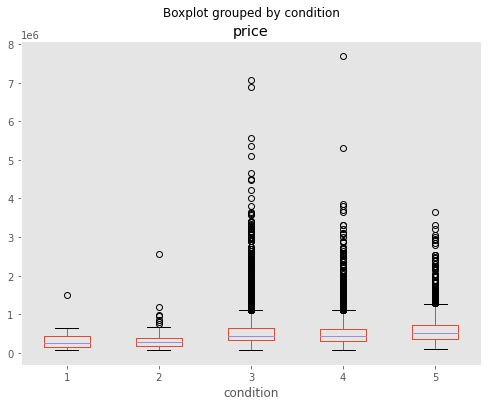

In [99]:
fig, ax = plt.subplots(figsize=(8,6))
fig = house.boxplot('price', 'condition', ax=ax, grid=False)

In [101]:
model = ols('price ~ C(condition)', data=house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     37.41
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           3.12e-31
Time:                        12:20:15   Log-Likelihood:            -3.0753e+05
No. Observations:               21613   AIC:                         6.151e+05
Df Residuals:                   21608   BIC:                         6.151e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.344e+05   6.68e+04      5.006      0.000    2.03e+05    4.65e+05
C(condition)[T.2] -7144.5213   7.24e+04     -0.099      0.921   -1.49e+05    1.35e+05
C(condition)[T.3]  2.076e+05   6.69e+04      3.104      0.002    7.65e+04    3.39e+05
C(condition)[T.4]  1.868e+05    6.7e+04      2.788      0.005    5.55e+04    3.18e+05
C(condition)[T.5]   2.78e+05   6.74e+04      4.125      0.000    1.46e+05     4.1e+05
==============================================================================
Omnibus:                    19204.851   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1164858.777
Skew:                           4.044   Prob(JB):                         0.00
Kurtosis:                      38.044   Cond. No.                         74.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### One-way ANOVA price ~ grade

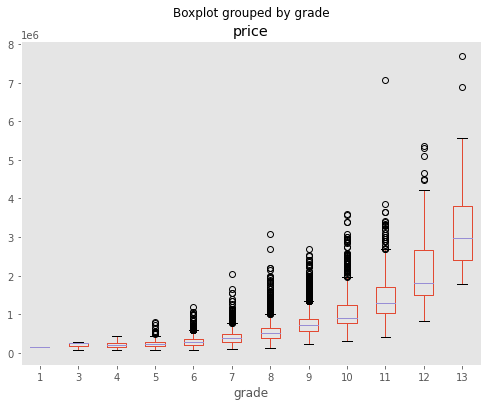

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
fig = house.boxplot('price', 'grade', ax=ax, grid=False)

In [104]:
model = ols('price ~ C(grade)', data=house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2125.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:20:28   Log-Likelihood:            -2.9968e+05
No. Observations:               21613   AIC:                         5.994e+05
Df Residuals:                   21601   BIC:                         5.995e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.42e+05   2.54e+05      0.558      0.577   -3.57e+05    6.41e+05
C(grade)[T.3]   6.367e+04   2.94e+05      0.217      0.828   -5.12e+05     6.4e+05
C(grade)[T.4]   7.238e+04   2.59e+05      0.280      0.780   -4.35e+05     5.8e+05
C(grade)[T.5]   1.065e+05   2.55e+05      0.418      0.676   -3.93e+05    6.06e+05
C(grade)[T.6]   1.599e+05   2.55e+05      0.628      0.530   -3.39e+05    6.59e+05
C(grade)[T.7]   2.606e+05   2.55e+05      1.024      0.306   -2.38e+05    7.59e+05
C(grade)[T.8]   4.009e+05   2.55e+05      1.575      0.115    -9.8e+04       9e+05
C(grade)[T.9]   6.315e+05   2.55e+05      2.481      0.013    1.33e+05    1.13e+06
C(grade)[T.10]  9.298e+05   2.55e+05      3.652      0.000    4.31e+05    1.43e+06
C(grade)[T.11]  1.355e+06   2.55e+05      5.317      0.000    8.55e+05    1.85e+06
C(grade)[T.12]  2.049e+06   2.56e+05      8.008      0.000    1.55e+06    2.55e+06
C(grade)[T.13]  3.568e+06   2.64e+05     13.508      0.000    3.05e+06    4.09e+06
==============================================================================
Omnibus:                    15806.228   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           798687.869
Skew:                           3.000   Prob(JB):                         0.00
Kurtosis:                      32.170   Cond. No.                         581.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Dummy Encoding

This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories. Our raw dataframe is imported to create different subset for dummies. Then the original categorical columns are dropped and the return is the merged dataframe from different categorical subset using the concat method from the pandas library.


In [107]:
def process_categorical_features(house):
    dummies_waterfront = pd.get_dummies(house['waterfront'], prefix = 'waterfront', drop_first = True)
    dummies_view = pd.get_dummies(house['view'], prefix = 'view', drop_first = True)
    dummies_grade = pd.get_dummies(house['grade'], prefix = 'grade', drop_first = True)
    dummies_condition = pd.get_dummies(house['condition'], prefix = 'condition', drop_first = True)
    dummies_yr_renovated = pd.get_dummies(house['yr_renovated'], prefix = 'yr_renovated', drop_first = True)
    
    house.drop(['waterfront','view','grade','condition','yr_renovated'], axis=1, inplace = True)
    
    return pd.concat([house,dummies_waterfront,dummies_view,dummies_grade,dummies_condition,dummies_yr_renovated], axis=1)

house = process_categorical_features(house)

In [108]:
house.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors sqft_above  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0       1180   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0       2170   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0        770   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0       1050   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0       1680   

   sqft_basement  yr_built  ...  grade_9  grade_10  grade_11  grade_12  grade_13  condition_2  \
0              0      1955  ...        0         0         0         0         0            0   
1            400      1951  ...        0         0         0         0         0            0   
2              0      1933  ...        0         0         0         0         0            0   
3            910      1965  ...        0         0         0         0         0            0   
4              0      1987  ...        0         0         0         0         0            0   

   condition_3  condition_4  condition_5  yr_renovated_1  
0            1            0            0               0  
1            1            0            0               1  
2            1            0            0               0  
3            0            0            1               0  
4            1            0            0               0  

[5 rows x 37 columns]

## Standardisation of all continuous variables

#### Standardization (Z-Score normalisation)

All the continuous variables will be transformed in a way that it will have the properties of a standard normal distribution with the mean (μ)=0 and the standard deviation(σ)=1

In [109]:
from sklearn.preprocessing import StandardScaler

Scaling = StandardScaler()

In [110]:
Scaling.fit_transform(house[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement',
                             'yr_built','lat','long','sqft_living15','sqft_lot15']])

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [111]:
house

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors sqft_above  \
0     2014-10-13  221900.0         3       1.00         1180      5650     1.0       1180   
1     2014-12-09  538000.0         3       2.25         2570      7242     2.0       2170   
2     2015-02-25  180000.0         2       1.00          770     10000     1.0        770   
3     2014-12-09  604000.0         4       3.00         1960      5000     1.0       1050   
4     2015-02-18  510000.0         3       2.00         1680      8080     1.0       1680   
...          ...       ...       ...        ...          ...       ...     ...        ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131     3.0       1530   
21609 2015-02-23  400000.0         4       2.50         2310      5813     2.0       2310   
21610 2014-06-23  402101.0         2       0.75         1020      1350     2.0       1020   
21611 2015-01-16  400000.0         3       2.50         1600      2388     2.0       1600   
21612 2014-10-15  325000.0         2       0.75         1020      1076     2.0       1020   

       sqft_basement  yr_built  ...  grade_9  grade_10  grade_11  grade_12  grade_13  condition_2  \
0                  0      1955  ...        0         0         0         0         0            0   
1                400      1951  ...        0         0         0         0         0            0   
2                  0      1933  ...        0         0         0         0         0            0   
3                910      1965  ...        0         0         0         0         0            0   
4                  0      1987  ...        0         0         0         0         0            0   
...              ...       ...  ...      ...       ...       ...       ...       ...          ...   
21608              0      2009  ...        0         0         0         0         0            0   
21609              0      2014  ...        0         0         0         0         0            0   
21610              0      2009  ...        0         0         0         0         0            0   
21611              0      2004  ...        0         0         0         0         0            0   
21612              0      2008  ...        0         0         0         0         0            0   

       condition_3  condition_4  condition_5  yr_renovated_1  
0                1            0            0               0  
1                1            0            0               1  
2                1            0            0               0  
3                0            0            1               0  
4                1            0            0               0  
...            ...          ...          ...             ...  
21608            1            0            0               0  
21609            1            0            0               0  
21610            1            0            0               0  
21611            1            0            0               0  
21612            1            0            0               0  

[21613 rows x 37 columns]

### Split house Dataset

The house dataset was split 80% train and 20% test for all models.

Price is the target variable used to build the models.

In [112]:
X = house.drop(columns=['date','price', 'month', 'year'])
y = house[['price']]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=777)

## Ridge Regression Model

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

 Build a Ridge Regression Model, with alpha:1.0, and set to repeat 3 times

In [115]:
ridge_model = Ridge(alpha=1.0,normalize=True)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=777)
MAE = cross_val_score(ridge_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
MAE = np.absolute(MAE)
print('Average MAE: %.3f (%.3f)' % (np.mean(MAE), np.std(MAE)))

Average MAE: 127495.373 (3422.622)


In [116]:
tune_grid = dict()
tune_grid['alpha'] = [(x/100) for x in list(range(5,16,1))]
tune_grid

{'alpha': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]}

In [117]:
tune = GridSearchCV(ridge_model, tune_grid, 
                      scoring='neg_mean_absolute_error', cv=cv)
tune_results = tune.fit(X_train, y_train)

In [118]:
print('MAE: {:.3f}'.format(-tune_results.best_score_))
print('Parameters: {}'.format(tune_results.best_params_))

MAE: 118675.014
Parameters: {'alpha': 0.13}


Use the alpha parameter: 0.13 found above, and evaluate against the test using Mean Absolute Error (MAE)

In [119]:
ridge = Ridge(alpha=0.13,normalize=True)
ridge.fit(X_train, y_train)
y_predicted = ridge.predict(X_test)
print('Test MAE: {:3f}'.format(mean_absolute_error(y_test,y_predicted)))

Test MAE: 120232.104100


Check the coeficient for the model

In [120]:
coef = ridge.coef_
coefficients = {X_train.columns[i]: coef[0][i]
                for i in range(len(X_train.columns))}
coefficients

{'bedrooms': -10119.45540865131,
 'bathrooms': 40812.057087306304,
 'sqft_living': 64.27813874722895,
 'sqft_lot': 0.118776827245437,
 'floors': 24925.237823478205,
 'sqft_above': 61.083400604674,
 'sqft_basement': 61.811263094290275,
 'yr_built': -1607.2704977382416,
 'lat': 523225.6220570711,
 'long': -117801.57647094714,
 'sqft_living15': 47.88864191244864,
 'sqft_lot15': -0.29821669963236597,
 'waterfront_1': 478875.07304409624,
 'view_1': 113734.95600501313,
 'view_2': 66050.36480563777,
 'view_3': 117679.11893115104,
 'view_4': 248719.54037930706,
 'grade_3': 65138.65077865055,
 'grade_4': -78969.79433278982,
 'grade_5': -113177.04499875594,
 'grade_6': -97031.0349691321,
 'grade_7': -70399.80755546247,
 'grade_8': -22897.44611249683,
 'grade_9': 77408.56708813437,
 'grade_10': 225149.3622091474,
 'grade_11': 442192.89070965664,
 'grade_12': 795385.642160829,
 'grade_13': 1634109.562105203,
 'condition_2': -28253.586608755533,
 'condition_3': -23964.93643741407,
 'condition_4': 1

In [121]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.72
Test set score: 0.73


## LASSO Regression

In [122]:
lasso_model = Lasso(alpha=1.0,normalize=True)
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=77)
MAE = cross_val_score(lasso_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
MAE = np.absolute(MAE)
print('Average MAE: %.3f (%.3f)' % (np.mean(MAE), np.std(MAE)))

Average MAE: 119220.882 (3896.290)


In [123]:
tune_grid = dict()
tune_grid['alpha'] = [(x/100) for x in list(range(850,955,5))]
tune_grid

{'alpha': [8.5,
  8.55,
  8.6,
  8.65,
  8.7,
  8.75,
  8.8,
  8.85,
  8.9,
  8.95,
  9.0,
  9.05,
  9.1,
  9.15,
  9.2,
  9.25,
  9.3,
  9.35,
  9.4,
  9.45,
  9.5]}

In [124]:
tune = GridSearchCV(lasso_model, tune_grid, 
                      scoring='neg_mean_absolute_error', 
                      cv=cv)
tune_results = tune.fit(X_train, y_train)

In [125]:
print('MAE: {:.3f}'.format(-tune_results.best_score_))
print('Parameters: {}'.format(tune_results.best_params_))

MAE: 119065.627
Parameters: {'alpha': 9.5}


In [126]:
lasso = Lasso(alpha=9.5,normalize=True,max_iter=5000)
lasso.fit(X_train, y_train)
y_predicted = lasso.predict(X_test)
print('Test MAE: {:3f}'.format(mean_absolute_error(y_test,y_predicted)))

Test MAE: 120959.397768


In [127]:
coef = lasso.coef_
coefficients = {X_train.columns[i]: coef[i] 
                for i in range(len(X_train.columns))}
coefficients

{'bedrooms': -13183.449514330661,
 'bathrooms': 42068.40943149642,
 'sqft_living': 129.60236277168,
 'sqft_lot': 0.05365485685282594,
 'floors': 22131.62449228342,
 'sqft_above': 0.0,
 'sqft_basement': 0.0,
 'yr_built': -1992.0306569223094,
 'lat': 562234.5798680712,
 'long': -92854.4867948955,
 'sqft_living15': 34.1904615798233,
 'sqft_lot15': -0.2622437824841087,
 'waterfront_1': 528001.799889777,
 'view_1': 114194.23306292575,
 'view_2': 60354.240085825404,
 'view_3': 112718.18251944774,
 'view_4': 230740.63300996824,
 'grade_3': 0.0,
 'grade_4': -51093.52708264728,
 'grade_5': -114342.45694506403,
 'grade_6': -98675.98925921554,
 'grade_7': -58208.08714419106,
 'grade_8': 0.0,
 'grade_9': 116390.32569389437,
 'grade_10': 283846.61884983885,
 'grade_11': 529380.5585333878,
 'grade_12': 921322.8382794607,
 'grade_13': 1828803.8848154643,
 'condition_2': -27512.330596090007,
 'condition_3': -35738.13080687814,
 'condition_4': 0.0,
 'condition_5': 33570.24728828398,
 'yr_renovated_1': 

In [128]:
for w in sorted(coefficients, key=coefficients.get, reverse=True):
    print(w,coefficients[w])

grade_13 1828803.8848154643
grade_12 921322.8382794607
lat 562234.5798680712
grade_11 529380.5585333878
waterfront_1 528001.799889777
grade_10 283846.61884983885
view_4 230740.63300996824
grade_9 116390.32569389437
view_1 114194.23306292575
view_3 112718.18251944774
view_2 60354.240085825404
yr_renovated_1 51551.24667853943
bathrooms 42068.40943149642
condition_5 33570.24728828398
floors 22131.62449228342
sqft_living 129.60236277168
sqft_living15 34.1904615798233
sqft_lot 0.05365485685282594
sqft_above 0.0
sqft_basement 0.0
grade_3 0.0
grade_8 0.0
condition_4 0.0
sqft_lot15 -0.2622437824841087
yr_built -1992.0306569223094
bedrooms -13183.449514330661
condition_2 -27512.330596090007
condition_3 -35738.13080687814
grade_4 -51093.52708264728
grade_7 -58208.08714419106
long -92854.4867948955
grade_6 -98675.98925921554
grade_5 -114342.45694506403


In [129]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.72
Test set score: 0.73


### Verifying the model performance
Look back at the specif price in the test dataset, here represented by (i) and compare predicted price with the actual price of the house is a way to evaluate the model performance.

In [130]:
i = 4
predicted_price = lasso.predict(X_test.iloc[i].values.reshape(1,-1))
print(f"Predicted price:{predicted_price[0]:.2f} \n Actual price: {y_test.iloc[i]}")

Predicted price:676256.15 
 Actual price: price    630000.0
Name: 17997, dtype: float64


## Linear regression model

Applying Linear regression model without performance dimensionality reduction with PCA.

In [131]:
X = house.drop(columns=['date','price', 'month', 'year'])
y = house[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=777)

After split the dataset 80% train and 20% test, next fit the intercept and fit the model into X_train and y_train

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [133]:
model.fit(X_train,y_train)

LinearRegression()

In [134]:
model.coef_

array([[-1.59485521e+04,  4.41347066e+04,  9.21260630e+01,
         1.55145408e-01,  2.41166302e+04,  3.47330640e+01,
         3.43857896e+01, -2.09466300e+03,  5.63312686e+05,
        -9.43950435e+04,  3.40033604e+01, -4.18910595e-01,
         5.35171186e+05,  1.23088217e+05,  6.38642112e+04,
         1.16836461e+05,  2.33031970e+05,  5.03851345e+04,
        -1.06129132e+05, -1.48345514e+05, -1.26188405e+05,
        -7.99608070e+04, -1.76501594e+04,  1.04255887e+05,
         2.74802157e+05,  5.25861560e+05,  9.29356660e+05,
         1.87214522e+06,  4.62802362e+04,  5.00183572e+04,
         8.93526471e+04,  1.24342748e+05,  5.39167412e+04]])

In [135]:
model.intercept_

array([-34136159.95927319])

Print the scores training and test set

In [136]:
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Training set score: 0.72
Test set score: 0.73


### Split the data, scale and apply PCA - Principal Component Analysis

In [137]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error

In [138]:
X = house.drop(columns=['date','price', 'month', 'year'])
y = house[['price']]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=777)

X_train_scaled = preprocessing.scale(X_train,with_std = False)
X_test_scaled = preprocessing.scale(X_test,with_std = False)

In [140]:
X_train_scaled

array([[-3.71370735e-01,  3.87709659e-01, -3.44094101e+02, ...,
        -2.60902256e-01, -7.91787160e-02, -4.21631001e-02],
       [-3.71370735e-01, -1.12290341e-01,  3.59058994e+01, ...,
        -2.60902256e-01,  9.20821284e-01, -4.21631001e-02],
       [ 6.28629265e-01, -3.62290341e-01, -2.60094101e+02, ...,
         7.39097744e-01, -7.91787160e-02, -4.21631001e-02],
       ...,
       [-3.71370735e-01,  3.87709659e-01,  3.15905899e+02, ...,
        -2.60902256e-01, -7.91787160e-02, -4.21631001e-02],
       [-3.71370735e-01, -3.62290341e-01,  4.59058994e+01, ...,
        -2.60902256e-01, -7.91787160e-02,  9.57836900e-01],
       [-3.71370735e-01,  3.87709659e-01, -3.40941006e+01, ...,
        -2.60902256e-01, -7.91787160e-02, -4.21631001e-02]])

In [141]:
pca = PCA(whiten=True).fit(X_train_scaled)
X_train_pca = pca.fit_transform(X_train_scaled)

In [142]:
X_test_pca = pca.transform(X_test_scaled)

In [143]:
print(X_train_pca.shape)

(17290, 33)


Text(0, 0.5, 'Eigenvalue')

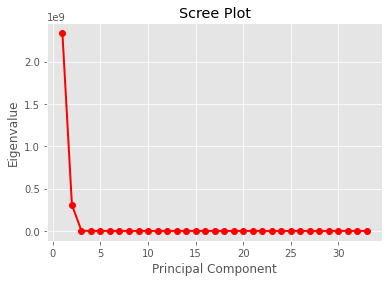

In [144]:
principal_component_number = np.arange(33) + 1
plt.plot(principal_component_number, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

Visualize in the array bellow how much the first variable of the dataset contribute to the dimensionallity reduction process.

In [145]:
pca.components_[0,]

array([ 6.31089566e-07,  1.48838540e-06,  3.51304275e-03,  8.70531485e-01,
       -8.04329785e-08,  3.36877361e-03,  1.45125685e-04,  3.56745941e-05,
       -2.68133297e-07,  7.42845784e-07,  2.30357211e-03,  4.92083240e-01,
        4.89012521e-08, -2.12794829e-08,  1.76860140e-07,  2.55228507e-07,
        4.95548662e-08,  1.28739058e-09,  8.08146578e-09,  4.72051715e-08,
       -1.05791805e-07, -7.11144173e-07, -2.83150510e-07,  3.52199427e-07,
        3.57546951e-07,  2.32891503e-07,  9.62426268e-08,  4.39022475e-09,
        6.84430696e-08, -9.99693745e-08,  1.15957651e-07, -8.37359146e-08,
        2.91764317e-08])

In [146]:
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

1.0000000000000002

Run PCA now using the 2 Principal Components as described in the graphic above as been carrying the main components of our dataset.

In [147]:
pca2 = PCA(whiten=True, n_components = 2).fit(X_train_scaled)
X_train_pca2 = pca2.fit_transform(X_train_scaled)

In [148]:
X_test_pca2 = pca2.fit_transform(X_test_scaled)

In [149]:
print(X_train_pca2.shape)

(17290, 2)


The first principal component explain 88% of the variance and the second 10%. Together the first 2 principal components have a cumulative variance explained of 98%, or we can say they retain 98% of the variance in the data.

In [150]:
explained_variance=pca2.explained_variance_ratio_
explained_variance

array([0.88916841, 0.10954877])

### Stats Model Linear Regression

In [151]:
pca_model = sm.OLS(y_train,X_train_pca2)
pca_fit = pca_model.fit()

In [152]:
pca_predictions = pca_fit.predict(X_test_pca2)

In [153]:
pca_predictions

array([-2701.15053651, -8397.0422437 , -9110.60878532, ...,
       -7974.95477522, -5279.56238937, -7680.12381677])

In [154]:
mean_absolute_error(y_test,pca_predictions)

543752.0106072834

In [155]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f'
      % mean_squared_error(y_test,pca_predictions))

print('Coefficient of determination: %.2f'
      % r2_score(y_test,pca_predictions))

Mean squared error: 438737191830.42
Coefficient of determination: -2.04


The mean Absolute error is the difference obtain between the actual value and the values we predict.



### Multiple Linear Regression after using PCA

Multiple linear regression uses a linear function to predict the value of a target variable y, containing the function n independent variable x=[x₁,x₂,x₃,…,xₙ].

Multiple linear regression function: y =b ₀+b ₁x ₁+b₂x₂+b₃x₃+…+bₙxₙ

The model accepts not only numerical variables, but also categorical ones. To include a categorical variable in a regression model, the variable has to be encoded as a binary variable (dummy variable), what we already did in previous steps.


In [156]:
from sklearn import datasets, linear_model

In [157]:
mlr = linear_model.LinearRegression()
model = mlr.fit(X_train_pca2, y_train)
predictions2 = mlr.predict(X_test_pca2)

In [158]:
predictions2

array([[536488.19058552],
       [530792.29887833],
       [530078.73233672],
       ...,
       [531214.38634681],
       [533909.77873267],
       [531509.21730527]])

In [159]:
model.intercept_

array([539189.34112204])

In [160]:
model.score(X_train_pca2,y_train)

0.00895939211865282

Print the coefficients results, follow by Mean Squared error and the coeficient of determination (The ideal coefficient of determination: 1 is perfect prediction)

In [161]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', model.coef_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions2))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions2))

Coefficients: 
 [[34266.55978953 -3455.50423153]]
Mean squared error: 143166257392.04
Coefficient of determination: 0.01


## Logistic Regression Model

In [162]:
house.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors sqft_above  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0       1180   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0       2170   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0        770   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0       1050   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0       1680   

   sqft_basement  yr_built  ...  grade_9  grade_10  grade_11  grade_12  grade_13  condition_2  \
0              0      1955  ...        0         0         0         0         0            0   
1            400      1951  ...        0         0         0         0         0            0   
2              0      1933  ...        0         0         0         0         0            0   
3            910      1965  ...        0         0         0         0         0            0   
4              0      1987  ...        0         0         0         0         0            0   

   condition_3  condition_4  condition_5  yr_renovated_1  
0            1            0            0               0  
1            1            0            0               1  
2            1            0            0               0  
3            0            0            1               0  
4            1            0            0               0  

[5 rows x 37 columns]

In [163]:
X = house.drop(columns=['date','price', 'month', 'year', 'waterfront_1'])
y = house[['waterfront_1']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=777)

In [164]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [165]:
model.fit(X_train, y_train)

LogisticRegression()

In [166]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [167]:
model.score(X_test, y_test)

0.9935230164237798

In [168]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4294
           1       1.00      0.03      0.07        29

    accuracy                           0.99      4323
   macro avg       1.00      0.52      0.53      4323
weighted avg       0.99      0.99      0.99      4323



In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[4294,    0],
       [  28,    1]], dtype=int64)